## Perguntas que a BRA TeleCOM gostaria de responder...

## 🧠 1. Perfil do Cliente que Cancela (Churn)
Quais faixas etárias têm maior taxa de churn?

Existe uma relação entre tipo de plano (Pré-pago, Pós-pago, Controle) e o churn?

Clientes com fidelidade ativa cancelam menos?

Clientes com renda menor ou maior tendem a cancelar mais?

## 📈 2. Comportamento de Uso
Clientes com alto consumo de dados ou chamadas têm mais chance de sair?

O uso do aplicativo da operadora influencia na retenção?

Clientes que usam muitos dispositivos conectados cancelam mais?

## 🏷️ 3. Contrato e Pagamento
Qual o impacto do valor mensal pago no churn?

Tipos de contrato (mensal, anual, sem fidelidade) influenciam na permanência?

Clientes que mudaram de plano recentemente têm maior propensão a sair?

Há correlação entre atrasos de pagamento e churn?

## 📞 4. Suporte e Satisfação
Clientes que contataram o suporte recentemente cancelam mais?

Reclamações frequentes estão associadas ao churn?

Há uma nota de satisfação abaixo da qual o churn é mais provável?

## 🌍 5. Segmentação Geográfica e Demográfica
Certas regiões do país têm maiores taxas de churn?

O tipo de residência (urbana vs rural) influencia o comportamento?

Há padrões de churn específicos em segmentos como renda ou idade?

## 💡 6. Engajamento com a Marca
Participar do programa de fidelidade ajuda na retenção?

Receber ofertas especiais reduz a chance de cancelamento?

O tipo de aparelho usado tem impacto no churn?

## 🧪 7. Preditivas (Machine Learning)
Quais são os principais fatores que mais influenciam o churn?

Podemos construir um modelo preditivo de churn com base nos dados?

Qual a acurácia de um modelo de classificação como Random Forest, XGBoost ou Logistic Regression?

## Iniciando codificação para Analises

## 🧑‍💻 Passo a Passo para as Análises e Modelos em Python

1. Perfil do Cliente que Cancela (Churn)
Pergunta: Quais faixas etárias têm maior taxa de churn?

Objetivo: Explorar como a idade impacta o churn e identificar faixas etárias com maior risco.

Gráfico:
Usar um histograma ou boxplot para comparar as idades entre os clientes que cancelaram e os que permaneceram.

## 🚀 1. Carregando os Dados no Jupyter Notebook
Carregando os dados com pandas para verificarmos o formato do dataset.

In [1]:
import pandas as pd

# Carregar os dados (substitua o caminho pelo local correto)
file_path = r'C:\Users\USER\Documents\Datasets_para_Análises\bra_telecom_churn_enriquecido.xlsx'
df = pd.read_excel(file_path)

# Visualizar as primeiras linhas do dataset
df.head()


,ID,Idade,Plano,Tempo_com_Operadora,Uso_de_Dados,Chamadas,Mensagens,Churn,Minutos_Internacional,Tipo_Aparelho,...,Ultimo_Contato_Suporte,Usa_App,Programa_Fidelidade,Ofertas_Especiais,Regiao,Tipo_Residencia,Renda,Atrasos_Pagamento,Mudou_Plano,Concorrencia_Ativa
0,1,56,Pós-pago,24,4,256,287,0,30,Android,...,35,Sim,Não,Sim,Sudeste,Urbana,3106.85,Não,Sim,Não
1,2,69,Pós-pago,54,26,197,378,1,218,Android,...,27,Sim,Não,Sim,Sul,Urbana,1643.79,Não,Não,Não
2,3,46,Controle,35,40,92,23,0,11,Android,...,38,Não,Não,Não,Sul,Urbana,2192.21,Não,Não,Não
3,4,32,Pós-pago,26,9,195,445,0,31,iOS,...,76,Sim,Sim,Sim,Norte,Rural,5272.76,Não,Sim,Sim
4,5,60,Controle,37,5,261,416,0,159,iOS,...,170,Não,Não,Não,Nordeste,Urbana,2812.24,Não,Não,Não


## 📊 Pergunta 1: Quais faixas etárias têm maior taxa de churn?
VUtilizando um gráfico de barras para ver a distribuição do churn por faixa etária.

C:\Users\USER\AppData\Local\Temp\ipykernel_9732\3611298885.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_por_idade = df.groupby(['Faixa_Etaria', 'Churn']).size().unstack()


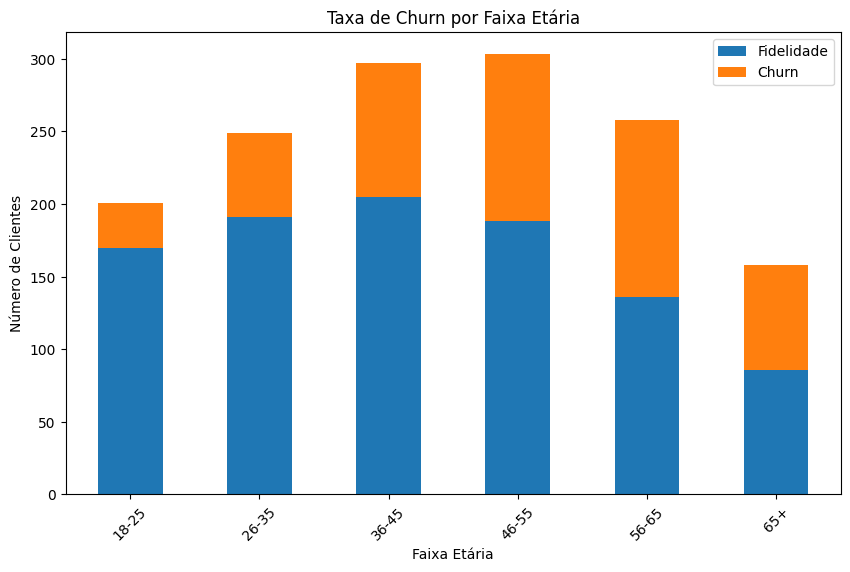

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você tenha uma coluna 'Idade' e 'Churn' (churn = 1 ou 0)
# Vamos criar uma faixa etária para a análise
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Contagem de churn por faixa etária
churn_por_idade = df.groupby(['Faixa_Etaria', 'Churn']).size().unstack()

# Plotando
churn_por_idade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Taxa de Churn por Faixa Etária')
plt.ylabel('Número de Clientes')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.legend(['Fidelidade', 'Churn'], loc='upper right')
plt.show()


## 📈 Pergunta 2: Existe uma relação entre tipo de plano e o churn?
Usaremos um gráfico de barras para comparar a taxa de churn entre os diferentes tipos de plano.

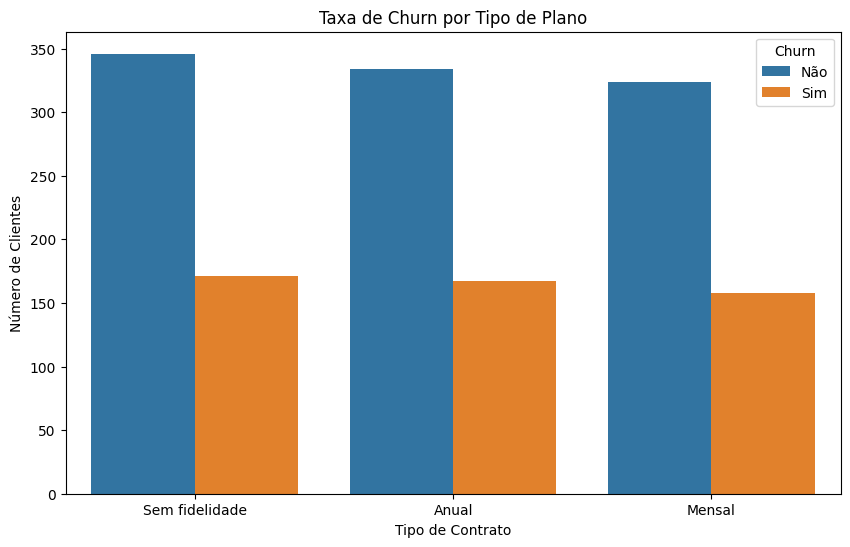

In [3]:
# Gráfico de barras para comparar churn entre tipos de plano
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tipo_Contrato', hue='Churn')
plt.title('Taxa de Churn por Tipo de Plano')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()


## 💸 Pergunta 3: Clientes com fidelidade ativa cancelam menos?
Usaremos um gráfico de barras para comparar churn entre clientes com e sem fidelidade ativa.

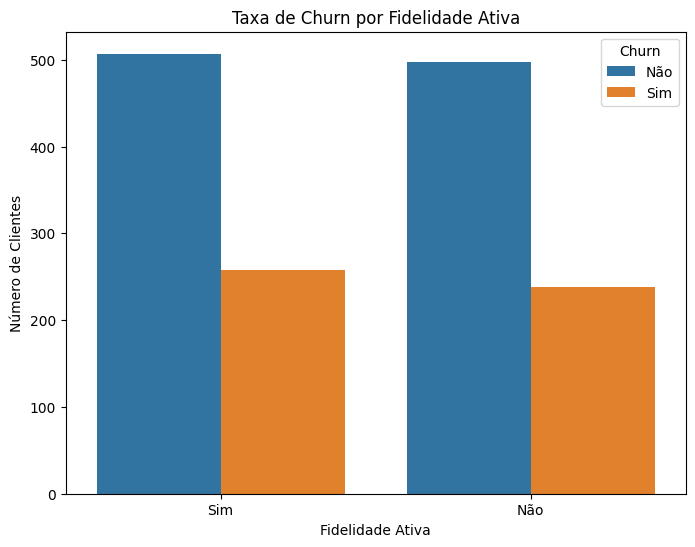

In [4]:
# Gráfico para comparar fidelidade e churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Fidelidade_Ativa', hue='Churn')
plt.title('Taxa de Churn por Fidelidade Ativa')
plt.xlabel('Fidelidade Ativa')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()


## 💡 Pergunta 4: Qual o impacto do valor mensal pago no churn?
Você pode usar um gráfico de dispersão para visualizar a relação entre o valor pago e o churn.

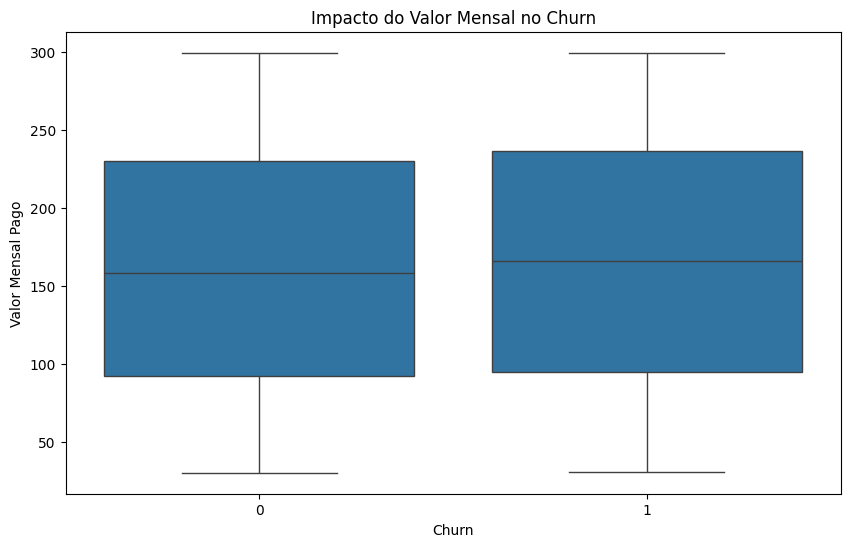

In [5]:
# Gráfico de dispersão entre valor mensal pago e churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Valor_Mensal')
plt.title('Impacto do Valor Mensal no Churn')
plt.xlabel('Churn')
plt.ylabel('Valor Mensal Pago')
plt.show()


## 📞 Pergunta 5: Há correlação entre o último contato com o suporte e o churn?
Aqui, um gráfico de barras pode mostrar se os clientes que contataram o suporte recentemente têm mais chance de churn.

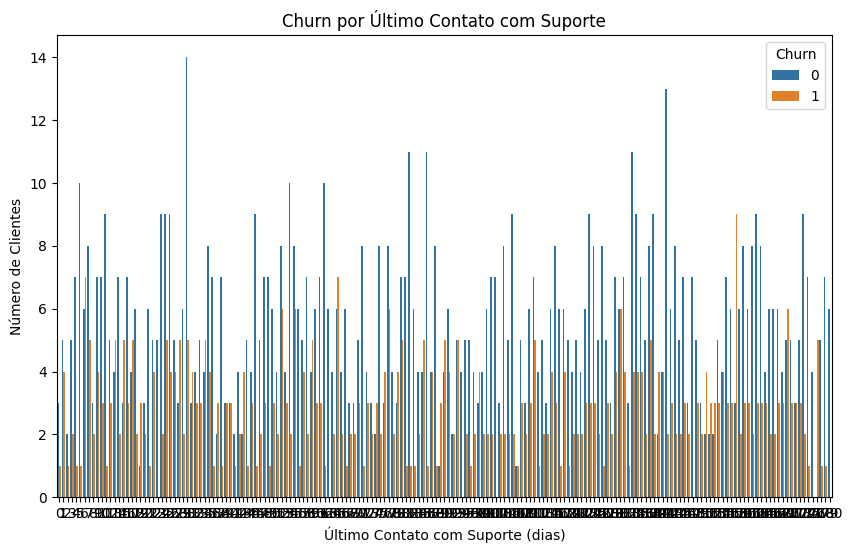

In [6]:
# Gráfico de barras para últimos contatos com o suporte
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ultimo_Contato_Suporte', hue='Churn')
plt.title('Churn por Último Contato com Suporte')
plt.xlabel('Último Contato com Suporte (dias)')
plt.ylabel('Número de Clientes')
plt.show()


## 🌍 Pergunta 6: Certas regiões do país têm maiores taxas de churn?
Podemos usar um gráfico de barras para analisar a taxa de churn por região.

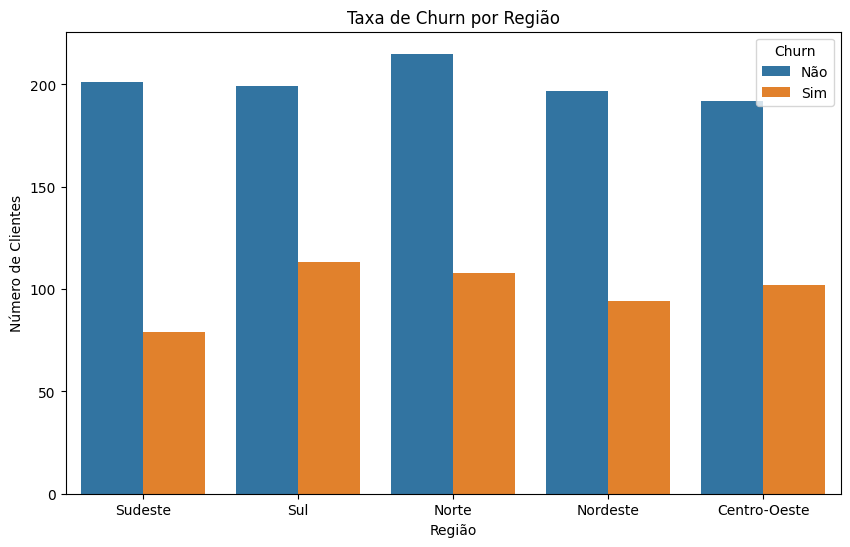

In [7]:
# Gráfico para comparar churn por região
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Regiao', hue='Churn')
plt.title('Taxa de Churn por Região')
plt.xlabel('Região')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()


## 🔍 Pergunta 7: Podemos construir um modelo preditivo de churn?
Aqui, vamos construir um modelo simples de classificação (ex: Logistic Regression ou Random Forest) para prever o churn. Vamos utilizar as variáveis mais relevantes para treinar o modelo.

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       197
           1       0.38      0.12      0.18       103

    accuracy                           0.63       300
   macro avg       0.52      0.51      0.47       300
weighted avg       0.56      0.63      0.56       300



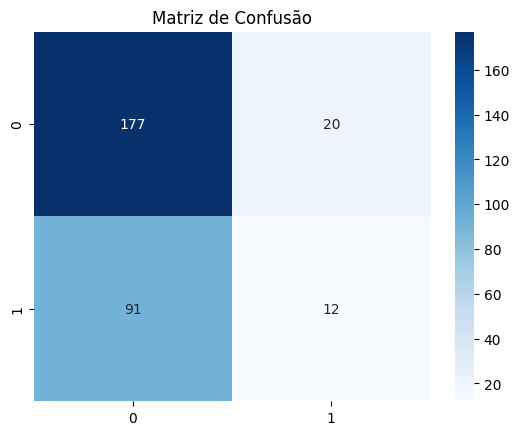

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Selecionando as variáveis preditoras
X = df[['Valor_Mensal', 'Reclamacoes', 'Satisfacao', 'Ultimo_Contato_Suporte', 'Renda']]
y = df['Churn']  # Variável alvo

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()


## Refinando o pré processamewnto dos dados

## 🧼 Etapa 1: Verificar e Tratar Valores Ausentes

In [9]:
# Verificar valores ausentes
df.isnull().sum()


ID                          0
Idade                       0
Plano                       0
Tempo_com_Operadora         0
Uso_de_Dados                0
Chamadas                    0
Mensagens                   0
Churn                       0
Minutos_Internacional       0
Tipo_Aparelho               0
Dispositivos_Conectados     0
Tipo_Contrato               0
Fidelidade_Ativa            0
Valor_Mensal                0
Reclamacoes                 0
Satisfacao                  0
Ultimo_Contato_Suporte      0
Usa_App                     0
Programa_Fidelidade         0
Ofertas_Especiais           0
Regiao                      0
Tipo_Residencia             0
Renda                       0
Atrasos_Pagamento           0
Mudou_Plano                 0
Concorrencia_Ativa          0
Faixa_Etaria               34
dtype: int64

## Decidimos excluir os valores nulos (são 34 valores nulos conforme o código da célula acima)

In [ ]:
# Excluímos linhas com valores nulos
df.dropna(subset=['Faixa_Etaria'], inplace=True)

## Conferindo se os valores nulos foram todos excluídos (sim eles foram excuídos conforme abaixo)

In [12]:
# Verificar valores ausentes
df.isnull().sum()

ID                         0
Idade                      0
Plano                      0
Tempo_com_Operadora        0
Uso_de_Dados               0
Chamadas                   0
Mensagens                  0
Churn                      0
Minutos_Internacional      0
Tipo_Aparelho              0
Dispositivos_Conectados    0
Tipo_Contrato              0
Fidelidade_Ativa           0
Valor_Mensal               0
Reclamacoes                0
Satisfacao                 0
Ultimo_Contato_Suporte     0
Usa_App                    0
Programa_Fidelidade        0
Ofertas_Especiais          0
Regiao                     0
Tipo_Residencia            0
Renda                      0
Atrasos_Pagamento          0
Mudou_Plano                0
Concorrencia_Ativa         0
Faixa_Etaria               0
dtype: int64

## 📊 Etapa 2: Verificando Tipos de Dados e Corrigindo caso seja necessário

In [14]:
# Verificar tipos
df.dtypes


ID                            int64
Idade                         int64
Plano                        object
Tempo_com_Operadora           int64
Uso_de_Dados                  int64
Chamadas                      int64
Mensagens                     int64
Churn                         int64
Minutos_Internacional         int64
Tipo_Aparelho                object
Dispositivos_Conectados       int64
Tipo_Contrato                object
Fidelidade_Ativa             object
Valor_Mensal                float64
Reclamacoes                   int64
Satisfacao                    int64
Ultimo_Contato_Suporte        int64
Usa_App                      object
Programa_Fidelidade          object
Ofertas_Especiais            object
Regiao                       object
Tipo_Residencia              object
Renda                       float64
Atrasos_Pagamento            object
Mudou_Plano                  object
Concorrencia_Ativa           object
Faixa_Etaria               category
dtype: object

In [16]:
# Converter colunas categóricas
df['Churn'] = df['Churn'].astype(int)
df['Fidelidade_Ativa'] = df['Fidelidade_Ativa'].astype('category')


## 🚫 Etapa 3: Verificar Outliers em Variáveis Numéricas

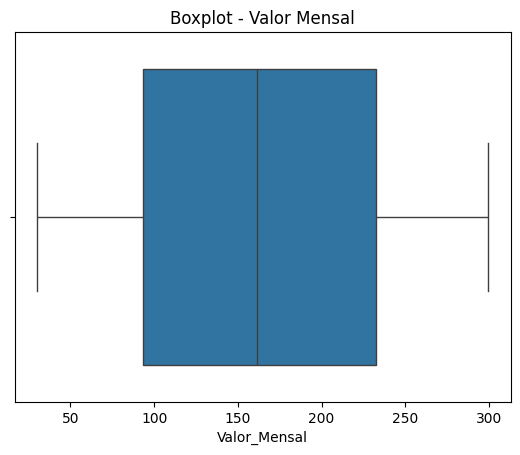

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para verificar outliers
sns.boxplot(x=df['Valor_Mensal'])
plt.title("Boxplot - Valor Mensal")
plt.show()


## Nenhum dado absurdo foi encontrado conforme boxplot acima

## ⚙️ Etapa 4: Codificar Variáveis Categóricas

Utilizando LabelEncoder para categorias com ordem:

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Tipo_Contrato'] = le.fit_transform(df['Tipo_Contrato'])


## 📏 Etapa 5: Escalar Variáveis Numéricas 

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
colunas_para_escalar = ['Valor_Mensal', 'Renda', 'Ultimo_Contato_Suporte']
df[colunas_para_escalar] = scaler.fit_transform(df[colunas_para_escalar])


✅ Resultado Final
Agora temos um dataset:

Sem valores ausentes;

Com variáveis numéricas escaladas;

Com variáveis categóricas codificadas;

Livre de outliers extremos;